<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/blob/main/3_7_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.7 Neural Networks

Artificial neural networks is a collection of connected layers of units or nodes
to loosely model the neurons in a biological brain. In this section, we illustrate
the use of differentiation for training artificial neural networks to minimize
cost functions.

We will setup our Neural Network in Python here and add to it as we go along.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [12]:
X = np.array([[1,0],[1,-1],[0,1]])
y = np.array([1, 1, 0])

In [13]:
def initialize_parameters(layer_dim):
    np.random.seed(100)
    parameters = {}
    Length = len(layer_dim)
    
    for i in range(1,Length):
        parameters['w'+str(i)]=np.random.rand(layer_dim[i],layer_dim[i-1])*0.1
        parameters['b'+str(i)]=np.zeros((layer_dim[i],1))
    
    return parameters

## 3.7.1 Mathematical Formulation

Figure $3.14$ shows the simplest network. $x_{1}$ and $x_{2}$ are inputs from the left and a forecast output on the right, $\hat{y}$, which is modified by the activation function $\sigma(z)$ chosen in advance.
$$
\hat{y}=\sigma(z)=\sigma\left(w_{1} a_{1}+w_{2} a_{2}+b\right)
$$
In neural networks, the weights, the $w_{i}$, and the bias, $b$, will be found nu-

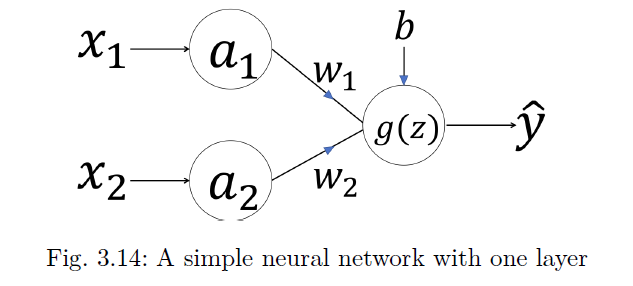

merically in order to best fit our forecast output with our given data.

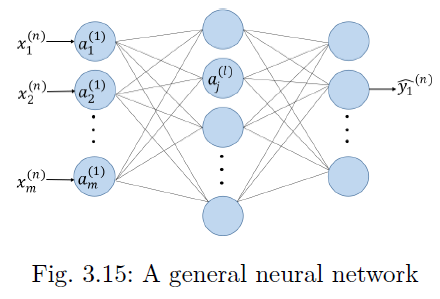

For a general neural network as in Figure 3.15 is a neural network. A
general network may has hundreds or thousands of nodes. It demonstrates the
inputs and outputs of neural networks. The input units receive various forms
and structures of information based on an internal weighting system, and the
neural network attempts to learn about the information presented to produce
one output report. Specifically, it adjust its weighted associations according
to a learning rule and using this error value. Successive adjustments will
cause the neural network to produce output which is increasingly similar to
the target output. After a sufficient number of these adjustments the training can be terminated based upon certain criteria. This is known as supervised
learning.

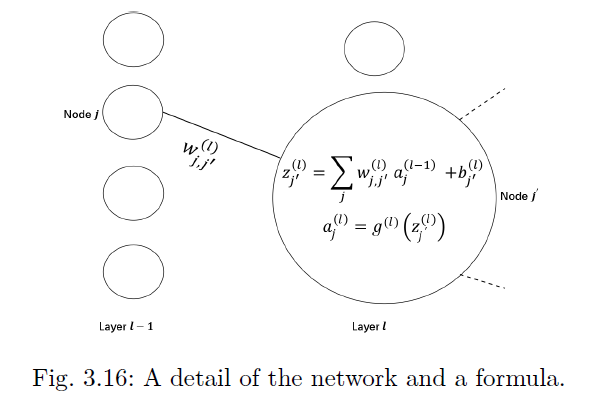

Now we formulate mathematical notation for a neural network. In Figure 3.16, we look at how values of layer $l$ are determined from layer $l-1, w^{l}, b^{l}$. We label the two layers as $l-1$ and $l$. Also notice that the general node in the left-hand layer is labelled $j$ and one in the right-hand layer, layer $l$, is labelled $j^{\prime}$. We want to calculate what value goes into the $j^{\prime t h}$ node of the $l^{\text {th }}$ layer. First multiply the value $a_{j}^{(l-1)}$ in the $j^{t h}$ node of the previous, $(l-1)^{t h}$ , layer by the parameter $w_{j, j^{\prime}}^{(l)}$ and then add another parameter $b_{j^{\prime}}^{(l)} .$ Then we add up all of these for every node in layer $l-1$. Let
$$
z_{j^{\prime}}^{(l)}=\sum_{j=1}^{J_{l-1}} w_{j, j^{\prime}}^{(l)} a_{j}^{(l-1)}+b_{j^{\prime}}^{(l)}
$$
where $J_{I}$ means the number of nodes in layer $l$. For a given activation function, $\sigma$, we end up with the following expression for the values in the next layer,
$$
a_{j^{\prime}}^{(l)}=\sigma\left(z_{j^{\prime}}^{(l)}\right)
$$
In matrix form,
$$
z^{(l)}=\mathbf{W}^{(l)} \mathbf{a}^{(l-1)}+\mathbf{b}^{(l)}
$$
with the matrix $\mathbf{W}^{(l)}$ containing all the multiplicative parameters, i.e. the weights $w_{j, j^{\prime}}^{(l)}$, and $\mathbf{b}^{(l)}$ is the bias. The bias is just the constant in the linear transformation.
$$
a^{(l)}=\sigma\left(\mathbf{z}^{(l)}\right)=\sigma\left(\mathbf{W}^{(l)} \mathbf{a}^{(l-1)}+\mathbf{b}^{(l)}\right)
$$

In [29]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

def relu(x):
    return(np.maximum(0,x))

def single_layer_forward_propagation(x,w_cur,b_cur,activation):
    # Apply linear combination
    z=np.dot(w_cur,x)+b_cur
    # Apply activation function
    if activation is 'relu':
        a = relu(z)
    elif activation is 'sigmoid':
        a = sigmoid(z)
    else:
        raise Exception('Not supported activation function')
    
    return z,a 
     
def full_forward_propagation(x,parameters):
    # Save z, a at each step, which will be used for backpropagation
    caches = {}
    caches['a0']=X.T
          
    A_prev=x
    Length=len(parameters)//2
    
    
    # For 1 to N-1 layers, apply relu activation function
    for i in range(1,Length):
        z, a = single_layer_forward_propagation(A_prev,parameters['w'+str(i)],parameters['b'+str(i)],'relu')     
        caches['z' + str(i)] = z
        caches['a' + str(i)] = a
        A_prev = a
        
    # For last layer, apply sigmoid activation function
    z, AL = single_layer_forward_propagation(a,parameters['w'+str(Length)],parameters['b'+str(Length)],'sigmoid')
    caches['z' + str(Length)] = z
    caches['a' + str(Length)] = AL

    return AL, caches     


## 3.7.2 Activation Functions

In neural networks, the activation function of a node abstracts the output of that node given an input or set of inputs for specific purposes for example, classification. In biological neural networks, the activation function may represent an electrical signal wether if the neuron fires. We use $\sigma$ to represent the activation functions. It will be the same for all nodes in a layer.
$$
a^{(l)}=\sigma\left(\mathbf{z}^{(l)}\right)=\sigma\left(\mathbf{W}^{(l)} \mathbf{a}^{(l-1)}+\mathbf{b}^{(l)}\right)
$$
Here we discuss a number of acitivation functions.


### 3.7.2.1 Step Function
$$
\sigma(x)= \begin{cases}0, & x < 0 \\ 1, & x \geq 0\end{cases}
$$
This is also called the Heaviside step function, or the unit step function, often represents a signal that switches on at a specified time and stays switched on indefinite. The step function can be use for classification problems.


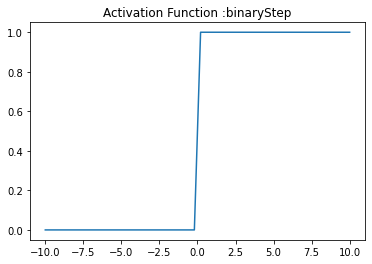

In [15]:
def binaryStep(x):
    ''' It returns '0' is the input is less then zero otherwise it returns one '''
    return np.heaviside(x,1)

x = np.linspace(-10, 10)
plt.plot(x, binaryStep(x))
plt.axis('tight')
plt.title('Activation Function :binaryStep')
plt.show()

### 3.7.2.2 ReLU Function
Positive linear/ReLU function is defined as
$$
\sigma(x)=\max (0, x)
$$
ReLU stands for Rectified Linear Units. It's one of the most commonly used activation function. The signal either passes through untouched or dies completely. It was found to enable better training of deeper networks compared to the widely used activation functions. Rectified linear units, compared to sigmoid function or similar activation functions, allow faster and effective training of deep neural architectures on large and complex datasets.


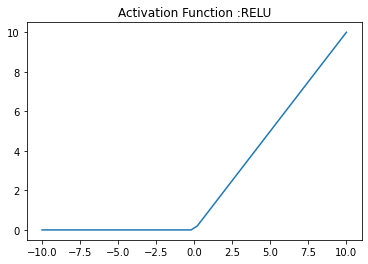

In [16]:
def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)

    return x1

x = np.linspace(-10, 10)
plt.plot(x, RELU(x))
plt.axis('tight')
plt.title('Activation Function :RELU')
plt.show()

### 3.7.2.3 Sigmoid
Sigmoid or logistic function
$$
\sigma(x)=\frac{1}{1+e^{-x}}
$$
The logistic function finds applications in a range of fields, including biomathematics. The logistic sigmoid can be used in the output layer for predicting probability.


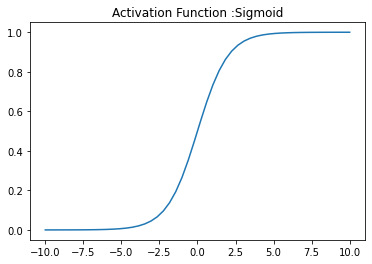

In [17]:
def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''
    return 1/(1+np.exp(-x))

x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.axis('tight')
plt.title('Activation Function :Sigmoid')
plt.show()

### 3.7.2.4 Softmax Function
The softmax function converts a vector of numbers (an array of $K$ values $(z)$ ) into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector. It is thus a function that turns several numbers into quantities that can be perhaps interpreted as probabilities.
$$
\frac{e^{z_{k}}}{\sum_{k=1}^{K} e^{z_{k}}}
$$
It is often used in the final, output, layer of a neural network, especially with classification problems.

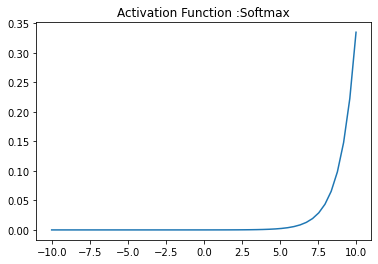

In [18]:
def softmax(x):
    ''' Compute softmax values for each sets of scores in x. '''
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.linspace(-10, 10)
plt.plot(x, softmax(x))
plt.axis('tight')
plt.title('Activation Function :Softmax')
plt.show()

## 3.7.3 Cost Function
In practice, we can use the least squares for a cost function. Since we will have a set of independent input data $y^{n}$ (from the training dataset) and corresponding output data $\hat{y}^{n}$ or the forecast output. $k$ is the $k$-th node of the output. We define the cost function as
$$
J=\frac{1}{2} \sum_{n=1}^{N} \sum_{K=1}^{K}\left(\hat{y}_{k}^{(n)}-y_{k}^{(n)}\right)^{2}
$$
For classification problems where only one output, the cost function commonly used for such an output is similar to logistic regression. And this is, for a binary classification $\left(y^{(n)}=0,1\right)$, the cost function is
$$
J=-\sum_{n=1}^{N}\left(y^{(n)} \ln \left(\hat{y}^{(n)}\right)+\left(1-y^{(n)}\right) \ln \left(1-\hat{y}^{(n)}\right)\right)
$$
This is related to the cross entropy function.


In [20]:
def cost_function(AL,y):
    m=AL.shape[1]
    cost = (-1/m) * np.sum(np.multiply(y,np.log(AL)) + np.multiply((1-y),np.log(1-AL)))
    # Make sure cost is a scalar
    cost = np.squeeze(cost)
    return cost


def convert_prob_into_class(AL):
    pred = np.copy(AL)
    pred[AL > 0.5]  = 1
    pred[AL <= 0.5] = 0
    return pred


def get_accuracy(AL, Y):
    pred = convert_prob_into_class(AL)
    return (pred == Y).all(axis=0).mean()

## 3.7.4 Backpropagation


Back-propagation is the essence of neural network training. It is the practice of fine-tuning the weights of a neural network based on the error rate (i.e. loss) obtained in the previous iteration. Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization. We want to minimize the cost function, $J$, with respect to the parameters, the components of $\mathbf{W}$ and $\mathrm{b}$. To do that using gradient descent we are going to need the derivatives of $J$ with respect to each of those parameters. Here we focus the layer $l$ and node $j^{\prime}$ and node $j$ from layer $l-1$
$$
\frac{\partial J}{\partial w_{j, j^{\prime}}^{(l)}} \operatorname{and} \frac{\partial J}{\partial b_{j^{\prime}}^{(l)}}
$$
We introduce the quantity
$$
\delta_{j^{\prime}}^{(l)}=\frac{\partial J}{\partial z_{j^{\prime}}^{(l)}}
$$
From the chain rule again, we have
$$
\delta_{j}^{(l-1)}=\frac{\partial J}{\partial z_{j}^{(l-1)}}=\sum_{j^{\prime}} \frac{\partial J}{\partial z_{j^{\prime}}^{(l)}} \frac{\partial z_{j^{\prime}}^{(l)}}{\partial z_{j}^{(l-1)}}
$$
It follows that
$$
z_{j^{\prime}}^{(l)}=\sum_{j_{k}} w_{j_{k}, j^{\prime}}^{(l)} a_{j_{k}}^{(l-1)}+b_{j^{\prime}}^{(l)}=\sum_{j_{k}} w_{j_{k}, j^{\prime}}^{(l)} \sigma\left(z_{j_{k}}^{(l-1)}\right)+b_{j^{\prime}}^{(l)}
$$
In addition,
$$
\delta_{j}^{(l-1)}=\left.\frac{d g^{(l-1)}}{d z}\right|_{z_{j}^{(l-1)}} \sum_{j^{\prime}} \frac{\partial J}{\partial z_{j^{\prime}}^{(l)}} w_{j, j^{\prime}}^{(l)}=\left.\frac{d g^{(l-1)}}{d z}\right|_{z_{j}^{(l-1)}} \sum_{j^{\prime}} \delta_{j^{\prime}}^{(l)} w_{j, j^{\prime}}^{(l)}
$$
As a result, we can find the $\delta \mathrm{s}$ in a layer if we know the $\delta \mathrm{s}$ in all layers to the right. In summary, we have
$$
\frac{\partial J}{\partial w_{j, j^{\prime}}^{(l)}}=\frac{\partial J}{\partial z_{j^{\prime}}^{(l)}} \frac{\partial z_{j^{\prime}}^{(l)}}{\partial w_{j, j^{\prime}}^{(l)}}=\delta_{j^{\prime}}^{(l)} a_{j}^{(l-1)}
$$
Now the derivatives of the cost function, $J$, to the $w$ s can be written in terms of the $\delta \mathrm{s}$ which in turn are backpropagated from the network layers that are just to the right, one nearer the output. And the derivatives of the cost function to the bias, $b$ is quite simple,
$$
\frac{\partial J}{\partial b_{j^{\prime}}^{(l)}}=\delta_{j^{\prime}}^{(l)}
$$
It is clear that the derivatives of $J$ is depending on which activation function we use. If it is ReLU then the derivative is either zero or one. If we use the logistic function then we find that $\sigma^{\prime}(z)=\sigma(1-\sigma)$.

In [22]:
# Backward Propagation
def sigmoid_backward_propagation(dA,z):
    sig=sigmoid(z)
    dz = dA * sig * (1-sig)
    return dz

def relu_backward_propagation(dA,z):
    dz = np.array(dA,copy=True)
    dz[z<=0]=0
    return dz
    
def single_layer_backward_propagation(dA_cur,w_cur,b_cur,z_cur,A_prev,activation):
    #Number of example
    m=A_prev.shape[1]
    
    # Part 1: Derivative for activation function
    # Select activation function
    if activation is 'sigmoid':
        backward_activation_func = sigmoid_backward_propagation
    elif activation is 'relu':
        backward_activation_func = relu_backward_propagation
    else:
        raise Exception ('Not supported activation function')
    # calculate derivative
    dz_cur = backward_activation_func(dA_cur,z_cur)
    
    # Part 2: Derivative for linear combination
    dw_cur = np.dot(dz_cur,A_prev.T)/m
    db_cur = np.sum(dz_cur,axis=1,keepdims=True)/m
    dA_prev = np.dot(w_cur.T,dz_cur)
    
    return dA_prev, dw_cur, db_cur

def full_backward_propagation(AL,y,caches,parameters):
    grads={}
    Length = len(caches)//2
    m = AL.shape[1]
    y = y.reshape(AL.shape)
    
    # Step 1: Derivative for cost function
    dA_cur = - (np.divide(y,AL) - np.divide((1-y),(1-AL)))
    
    # Step 2: Sigmoid backward propagation for N layer
    w_cur = parameters['w'+str(Length)]
    b_cur = parameters['b'+str(Length)]
    z_cur = caches['z'+str(Length)]
    A_prev = caches['a'+str(Length-1)]
    
    dA_prev, dw_cur, db_cur = single_layer_backward_propagation(dA_cur,w_cur,b_cur,z_cur,A_prev,'sigmoid')
    
    grads['dw'+str(Length)] = dw_cur
    grads['db'+str(Length)] = db_cur
    
    # Step 3: relu backward propagation for 1:(N-1) layer
    for i in reversed(range(1,Length)):
        dA_cur = dA_prev
        w_cur  = parameters['w'+str(i)]
        b_cur  = parameters['b'+str(i)]
        z_cur  = caches['z'+str(i)]
        A_prev = caches['a'+str(i-1)]
        
        dA_prev, dw_cur, db_cur = single_layer_backward_propagation(dA_cur,w_cur,b_cur,z_cur,A_prev,'relu')
        
        grads['dw'+str(i)]=dw_cur
        grads['db'+str(i)]=db_cur
    
    return grads

### 3.7.5 Backpropagation Algorithm


From above analysis, we can easily derive the backpragation algorithm as follows. First we initialize weights and biases, typically at random. Then pick input data and input the vector $x$ into the left side of the network, and calculate all the $z_{s}, a_{s}$, etc. And finally calculate the output $\hat{y}$. We now can update the parameters by the (stochastic)gradient descent. Repeat the process until the desired accuracy is reached. For example,if using the quadratic cost function in one dimension, then
$$
\delta^{(L)}=\left.\frac{d g^{(L)}}{d z}\right|_{z_{j}^{(L)}}(\hat{y}-y)
$$
Continue to the left
$$
\delta_{j}^{(l-1)}=\left.\frac{d g^{(l-1)}}{d z}\right|_{z_{j}^{(l-1)}} \sum_{j} \delta_{j^{\prime}}^{(l)} w_{j, j^{\prime}}^{(l)}
$$
Then update the weights and biases using the following formulas.
New $w_{j, j^{\prime}}^{(l)}=$ Old $w_{j, j^{\prime}}^{(l)}-\beta \frac{\partial J}{\partial w_{j, j^{\prime}}^{(l)}}=\operatorname{Old} w_{j, j^{\prime}}^{(l)}-\beta \delta_{j^{\prime}}^{(l)} a_{j}^{(l-1)}$
and
New $b_{j^{\prime}}^{(l)}=\operatorname{Old} b_{j^{\prime}}^{(l)}-\beta \frac{\partial J}{\partial b_{j^{\prime}}^{(l)}}=\operatorname{Old} b_{j^{\prime}}^{(l)}-\beta \delta_{j^{\prime}}^{(l)}$

In [24]:
def update_parameters(parameters,grads,learning_rate):
    Length = len(parameters)//2
    
    for i in (range(1,Length+1)):
        parameters['w'+str(i)] -= grads['dw'+str(i)] * learning_rate
        parameters['b'+str(i)] -= grads['db'+str(i)] * learning_rate
    
    return parameters

## Training the Neural Network

In [26]:
def train_model(X,y,epoch,layer_dim,learning_rate):
    # Store historical cost
    cost_history = []
    accuracy_history = []
    epoches=[]

    # Step 1: Initialize parameters
    parameters = initialize_parameters(layer_dim)

    for i in range(1,epoch):
        # Step 2: Forward propagation
        AL, caches = full_forward_propagation(X,parameters)
        
        # Step 3: Calculate and store cost
        cost = cost_function(AL,y)  
        cost_history.append(cost)
        
        accuracy =get_accuracy(AL,y)
        accuracy_history.append(accuracy)
        
        epoches.append(i)
        # Step 4: Backward propagation
        grads = full_backward_propagation(AL,y,caches,parameters)
        
        # Step 5: Update parameters
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if(i % 100 ==0):
            print('i='+str(i)+' cost = ' + str(cost))
            print('i='+str(i)+' accuracy = '+str(accuracy))
            #print(parameters)

    return parameters,cost_history, accuracy_history, epoches

## Running the Neural Network Model

In [33]:
from sklearn.datasets import make_moons

N_SAMPLES = 1000

X, y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)
test_parameters,test_cost,test_accuracy,test_epoches=train_model(X.T, y, 10000, [2,25,100,100,10,1],0.01)


i=100 cost = 0.5745440931383649
i=100 accuracy = 0.738
i=200 cost = 0.49035972622506596
i=200 accuracy = 0.816
i=300 cost = 0.4377042951884206
i=300 accuracy = 0.858
i=400 cost = 0.40313941120947905
i=400 accuracy = 0.875
i=500 cost = 0.3800620082662189
i=500 accuracy = 0.883
i=600 cost = 0.3616066368781873
i=600 accuracy = 0.892
i=700 cost = 0.34649405566149943
i=700 accuracy = 0.894
i=800 cost = 0.3343413957671847
i=800 accuracy = 0.897
i=900 cost = 0.3243314125459393
i=900 accuracy = 0.897
i=1000 cost = 0.3160541455456967
i=1000 accuracy = 0.896
i=1100 cost = 0.3090622462937729
i=1100 accuracy = 0.894
i=1200 cost = 0.30317733922129925
i=1200 accuracy = 0.896
i=1300 cost = 0.2981818975317995
i=1300 accuracy = 0.895
i=1400 cost = 0.2939577006248744
i=1400 accuracy = 0.894
i=1500 cost = 0.29027661752611605
i=1500 accuracy = 0.894
i=1600 cost = 0.28693971289600895
i=1600 accuracy = 0.895
i=1700 cost = 0.2840167306242856
i=1700 accuracy = 0.895
i=1800 cost = 0.2808174153160521
i=1800 acc